In [107]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read loan.csv
loan = pd.read_csv("loan.csv", sep=",", encoding = 'ISO-8859-1',low_memory=False)

In [3]:
# total records
len(loan)

39717

In [4]:
# total columns
len(loan.columns)

111

In [5]:
# group by loan status
loan.groupby("loan_status").count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,...,0,0,0,0,5509,5626,0,0,0,0
Current,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,...,0,0,0,0,1140,1140,0,0,0,0
Fully Paid,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,...,0,0,0,0,32371,32912,0,0,0,0


In [6]:
# columns with more than 50% of columns is empty
insufficient_columns = (loan.isnull().sum() * 100 / len(loan) >= 50)

In [7]:
# columns to be removed which are invalid
columns_tobe_removed = loan.columns[insufficient_columns]

In [8]:
# records with atleast 50% of data is present
loan = loan.drop(columns_tobe_removed, axis=1)

In [9]:
# columns after removing columns with insufficient data
len(loan.columns)

54

In [10]:
# remove the records where loan is still pending
loan = loan[loan['loan_status'] != 'Current']

In [11]:
len(loan)

38577

In [12]:
# group by loan status
loan.groupby("loan_status").count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,5627,5627,5627,5627,5627,5627,5627,5627,5627,5627,...,5627,5626,5621,5627,5627,5627,5621,5627,5509,5626
Fully Paid,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,...,32950,32949,32900,32950,32950,32950,32900,32950,32371,32912


In [74]:
# new column default, 1 if defaulted 0 if fully paid
loan["default"] = loan['loan_status'].apply(lambda x : 0 if x == "Fully Paid" else 1)



In [76]:
# defaulted count
loan["loan_amnt"].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [86]:
# loan amount category
# very los; upto 5000
# low; from 5000 to 10000
# medium; from 10000 to 20000
# high; from 20000 to 30000
# very high; above 30000
def loan_amount_category(loan_amount):
    if loan_amount <= 5000:
        return "very_low"
    elif loan_amount <= 10000:
        return "low"
    elif loan_amount <= 20000:
        return "medium"
    elif loan_amount <= 30000:
        return "high"
    else:
        return "very_high"

loan['loan_amount_category'] = loan['loan_amnt'].apply(loan_amount_category)

In [87]:
# groupb by loan_amount_category
loan.groupby("loan_amount_category").count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,default,int_rate_num,interest_rate_category,income_category
loan_amount_category,,,,,,,,,,,,,,,,,,,,,
high,3536,3536,3536,3536,3536,3536,3536,3536,3536,3536,...,3536,3536,3535,3536,3483,3535,3536,3536,3536,3536
low,12802,12802,12802,12802,12802,12802,12802,12802,12802,12802,...,12802,12802,12789,12802,12554,12793,12802,12802,12802,12802
medium,12032,12032,12032,12032,12032,12032,12032,12032,12032,12032,...,12032,12032,12027,12032,11835,12029,12032,12032,12032,12032
very_high,735,735,735,735,735,735,735,735,735,735,...,735,735,735,735,735,735,735,735,735,735
very_low,9472,9472,9472,9472,9472,9472,9472,9472,9472,9472,...,9472,9472,9435,9472,9273,9446,9472,9472,9472,9472


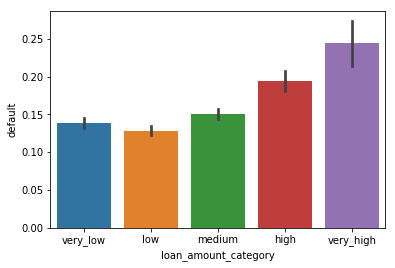

In [88]:
# graph with loan_amount_category with default
sns.barplot(x='loan_amount_category', y='default', data=loan)
plt.show()

In [23]:
# loan with higher amount has more chance of default
(loan.groupby("loan_amount_category")['default'].sum()/ loan.groupby("loan_amount_category")['default'].count()).sort_values()

loan_amount_category
medium    0.131657
low       0.138725
high      0.187471
Name: default, dtype: float64

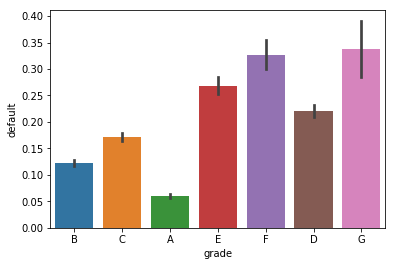

In [24]:
# graph of grade vs default count
sns.barplot(x='grade', y='default', data=loan)
plt.show()

In [25]:
# record with grade A has least chance of default and G with high chance of default
# in the order of grade G > F > E > D > C > B > A
(loan.groupby(['grade'])['default'].sum() / loan.groupby(['grade'])['default'].count()).sort_values()

grade
A    0.059930
B    0.122056
C    0.171943
D    0.219862
E    0.268494
F    0.326844
G    0.337793
Name: default, dtype: float64

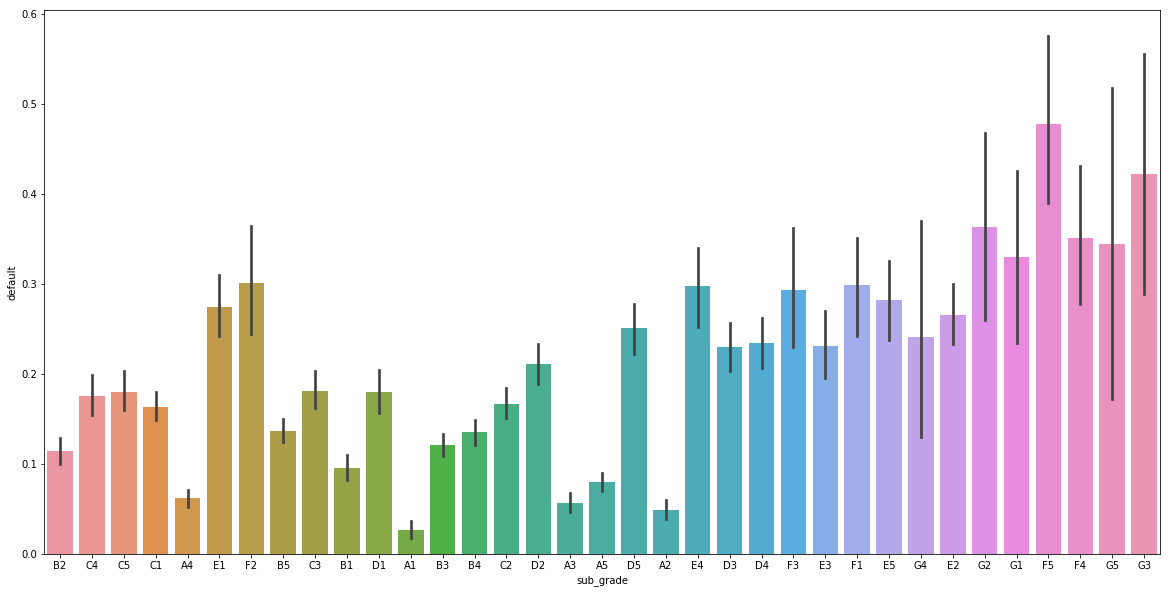

In [26]:
# graph of subgrade vs default
plt.figure(figsize=(20,10))
sns.barplot(x='sub_grade', y='default', data=loan)
plt.show()

In [27]:
# record with grade A1 has least chance of default and F5 with high chance of default
(loan.groupby(['sub_grade'])['default'].sum() / loan.groupby(['sub_grade'])['default'].count()).sort_values()

sub_grade
A1    0.026339
A2    0.049072
A3    0.056906
A4    0.061956
A5    0.079926
B1    0.095159
B2    0.113943
B3    0.120708
B4    0.135002
B5    0.136138
C1    0.163504
C2    0.166235
C4    0.175788
D1    0.179377
C5    0.180243
C3    0.181452
D2    0.210731
D3    0.229391
E3    0.230620
D4    0.234205
G4    0.240741
D5    0.250600
E2    0.265472
E1    0.274238
E5    0.281654
F3    0.293103
E4    0.297170
F1    0.298361
F2    0.300429
G1    0.329787
G5    0.344828
F4    0.350993
G2    0.363636
G3    0.422222
F5    0.477876
Name: default, dtype: float64

In [28]:
# clean average interest rate
loan["int_rate_num"] = loan["int_rate"].apply(lambda x : pd.to_numeric(x.split("%")[0]))

In [29]:
# mean, median min and max of interest rates
print(loan["int_rate_num"].mean())
print(loan["int_rate_num"].median())
print(loan["int_rate_num"].min())
print(loan["int_rate_num"].max())

11.93221867952407
11.71
5.42
24.4


In [30]:
# interest rate category
# low; upto 8
# medium; from 8 to 16
# high; above 16
def interest_rate_category(rate):
    if rate <= 8:
        return "low"
    elif rate <= 16:
        return "medium"
    else:
        return "high"

loan['interest_rate_category'] = loan['int_rate_num'].apply(interest_rate_category)

In [31]:
loan.groupby('interest_rate_category').count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,default,loan_amount_category,int_rate_num
interest_rate_category,,,,,,,,,,,,,,,,,,,,,
high,5408,5408,5408,5408,5408,5408,5408,5408,5408,5408,...,5408,5408,5408,5408,5408,5401,5408,5408,5408,5408
low,8218,8218,8218,8218,8218,8218,8218,8218,8218,8218,...,8218,8218,8218,8204,8218,8137,8207,8218,8218,8218
medium,24951,24951,24951,24951,24951,24951,24951,24951,24951,24951,...,24951,24951,24951,24909,24951,24342,24923,24951,24951,24951


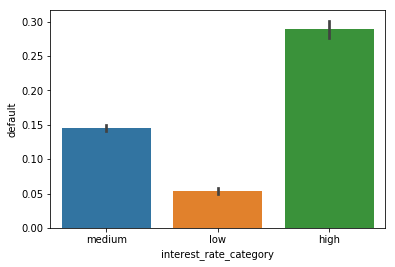

In [32]:
# graph of interest_rate_category vs default count
sns.barplot(x='interest_rate_category', y='default', data=loan)
plt.show()

In [33]:
# loan with higher interest rate has higher chance of default.

(loan.groupby(['interest_rate_category'])['default'].sum() / loan.groupby(['interest_rate_category'])['default'].count()).sort_values()

interest_rate_category
low       0.053541
medium    0.145285
high      0.288831
Name: default, dtype: float64

In [34]:
# by verification status
loan.groupby("verification_status").count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,default,loan_amount_category,int_rate_num,interest_rate_category
verification_status,,,,,,,,,,,,,,,,,,,,,
Not Verified,16694,16694,16694,16694,16694,16694,16694,16694,16694,16694,...,16694,16694,16638,16694,15998,16655,16694,16694,16694,16694
Source Verified,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,...,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677
Verified,12206,12206,12206,12206,12206,12206,12206,12206,12206,12206,...,12206,12206,12206,12206,12205,12206,12206,12206,12206,12206


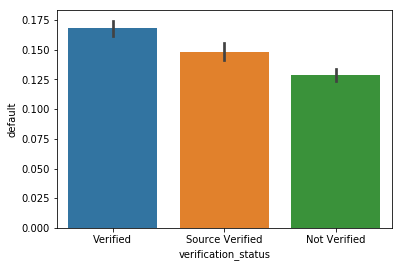

In [35]:
 sns.barplot(x='verification_status', y='default', data=loan)
plt.show()

In [36]:
# verifid records have higher chance of default

In [37]:
# by income category
# mean median min and max of income
print(loan["annual_inc"].mean())
print(loan["annual_inc"].median())
print(loan["annual_inc"].min())
print(loan["annual_inc"].max())

68777.97368120901
58868.0
4000.0
6000000.0


In [38]:
# income category
# low; upto 45000
# medium; from 45000 to 75000
# high; above 75000
def income_category(rate):
    if rate <= 45000:
        return "low"
    elif rate <= 75000:
        return "medium"
    else:
        return "high"
    
loan['income_category'] = loan['annual_inc'].apply(income_category)

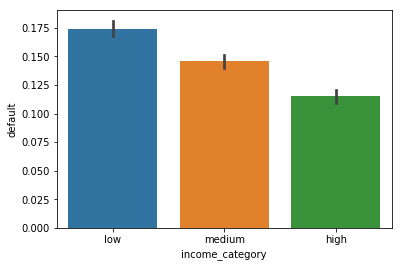

In [39]:
sns.barplot(x='income_category', y='default', data=loan)
plt.show()

In [40]:
# higher income has less chance of default.

In [41]:
# by purpose
loan_by_purpose = loan.groupby("purpose").count()['id'].sort_values(ascending=False)
print(loan_by_purpose)

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: id, dtype: int64


In [42]:
top_purpose = loan_by_purpose.index[0:5]
top_purpose_loan = loan[loan['purpose'].isin(top_purpose)]
top_purpose_loan.groupby('purpose').count()['id'].sort_values(ascending=False)

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
Name: id, dtype: int64

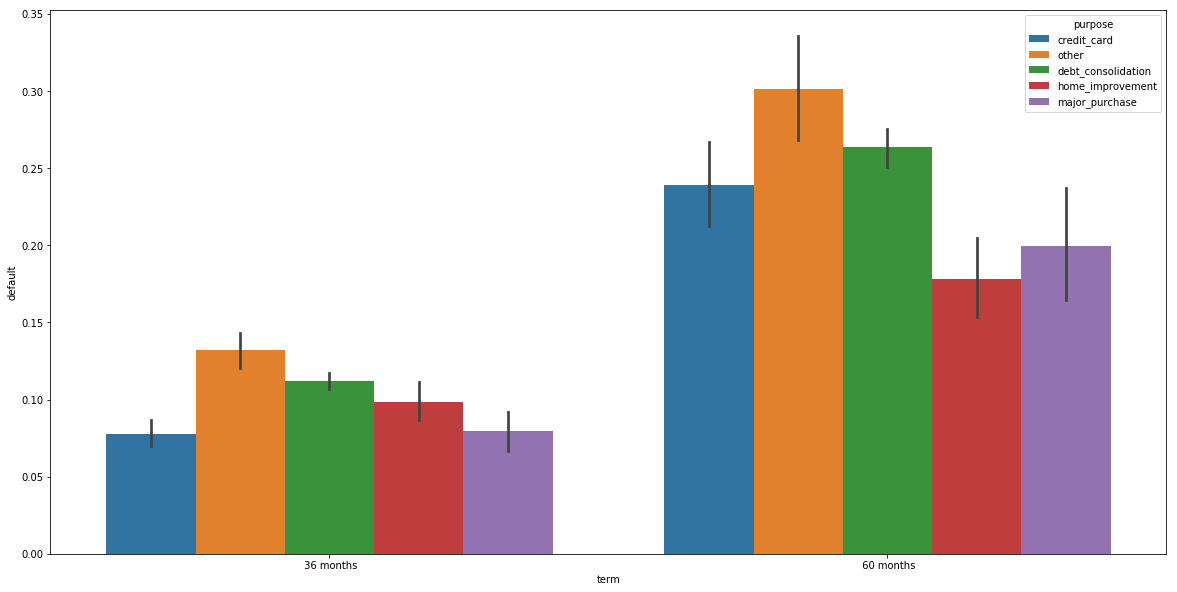

In [43]:
# loan by tenure and purpose

plt.figure(figsize=[20, 10])
sns.barplot(x='term',hue='purpose', y="default", data=top_purpose_loan)
plt.show()

In [44]:
# loan with 60 months tenure has higher chance of default.
# and loan for debt_consolidation has higher chances of default in both 36 month and 60 month tenure.


In [45]:
#by home ownership
loan.groupby("home_ownership").count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,default,loan_amount_category,int_rate_num,interest_rate_category,income_category
home_ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,17021,17021,17021,17021,17021,17021,17021,17021,17021,17021,...,17021,16993,17021,16769,17002,17021,17021,17021,17021,17021
NONE,3,3,3,3,3,3,3,3,3,3,...,3,1,3,0,1,3,3,3,3,3
OTHER,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
OWN,2975,2975,2975,2975,2975,2975,2975,2975,2975,2975,...,2975,2969,2975,2913,2969,2975,2975,2975,2975,2975
RENT,18480,18480,18480,18480,18480,18480,18480,18480,18480,18480,...,18480,18460,18480,18100,18468,18480,18480,18480,18480,18480


In [46]:
home_ownership_loan = top_purpose_loan[top_purpose_loan['home_ownership'].isin(['MORTGAGE','OWN','RENT'])]

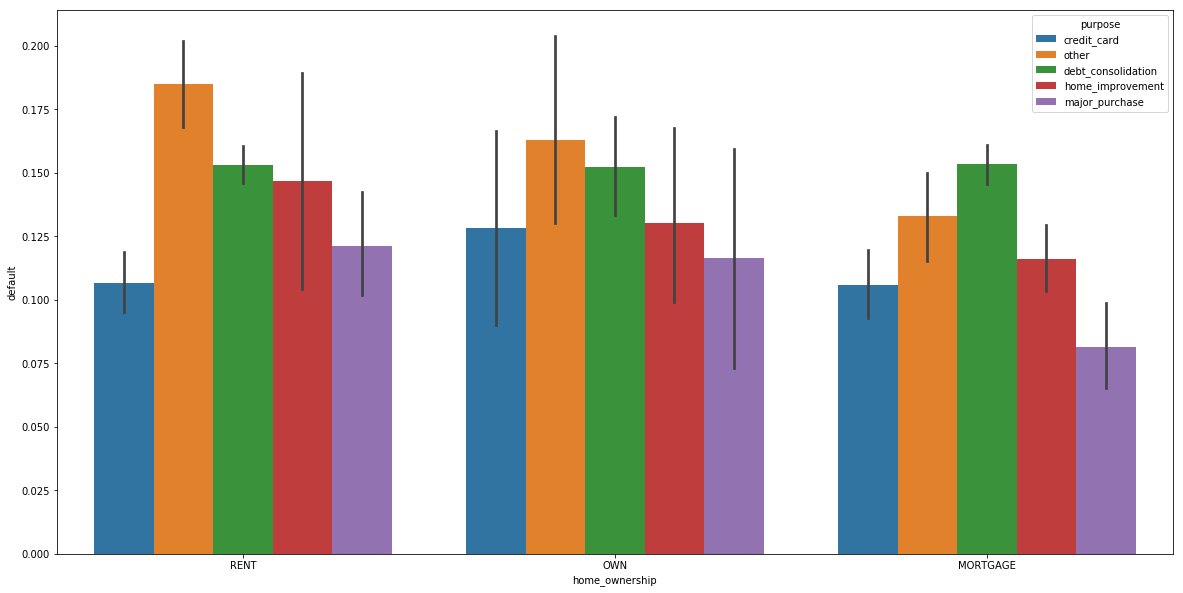

In [47]:
#loan by home owner ship
plt.figure(figsize=[20, 10])
sns.barplot(x='home_ownership',hue='purpose', y="default", data=home_ownership_loan)
plt.show()

In [48]:
# Rented owners has higher chance of default

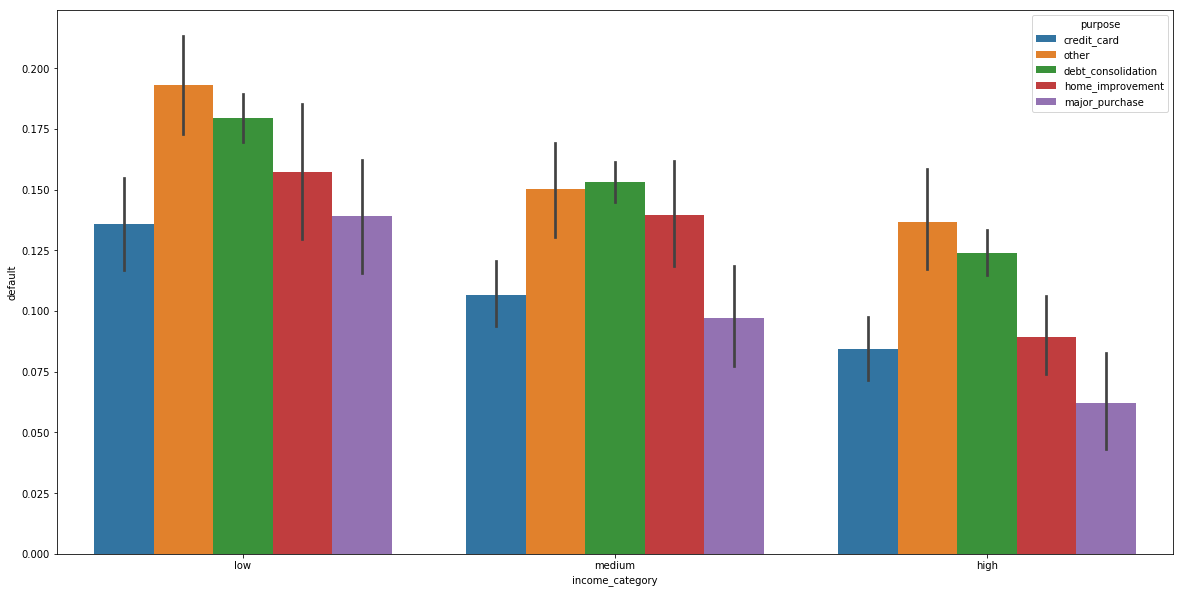

In [49]:
#loan by income category
plt.figure(figsize=[20, 10])
sns.barplot(x='income_category',hue='purpose', y="default", data=home_ownership_loan)
plt.show()

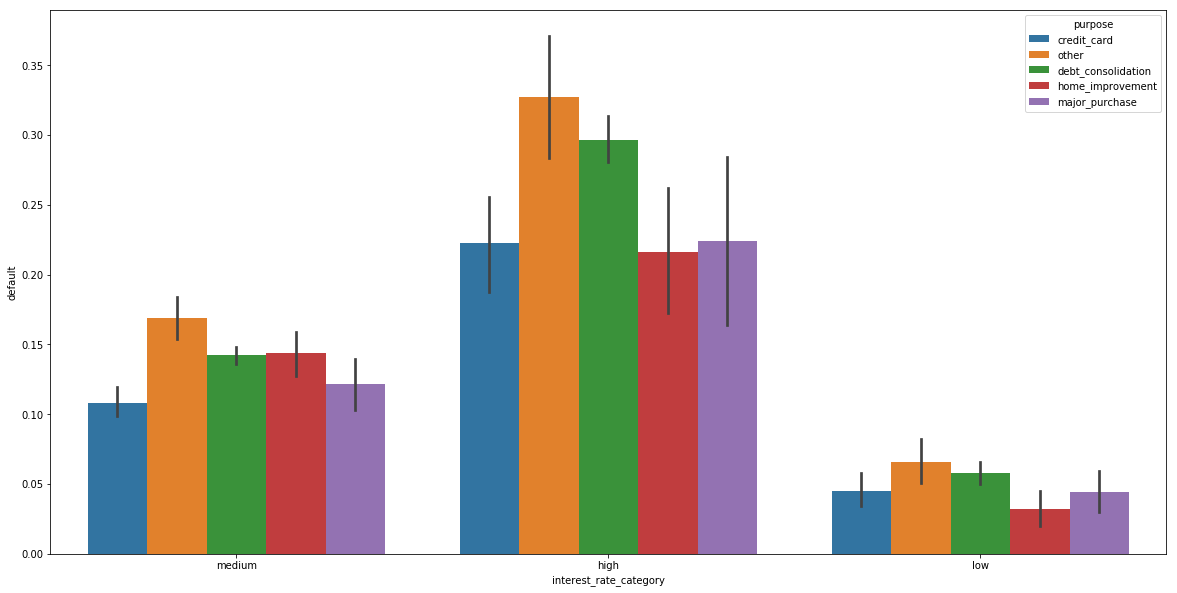

In [50]:
#loan by interest rate
plt.figure(figsize=[20, 10])
sns.barplot(x='interest_rate_category',hue='purpose', y="default", data=home_ownership_loan)
plt.show()

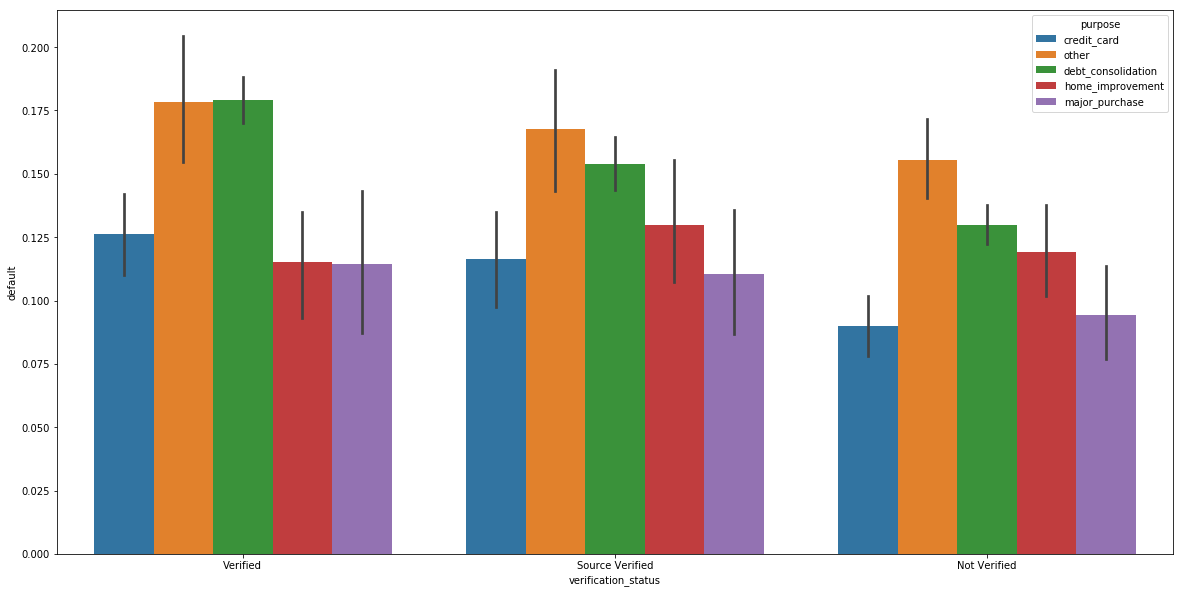

In [51]:
#loan by verification_status
plt.figure(figsize=[20, 10])
sns.barplot(x='verification_status',hue='purpose', y="default", data=home_ownership_loan)
plt.show()

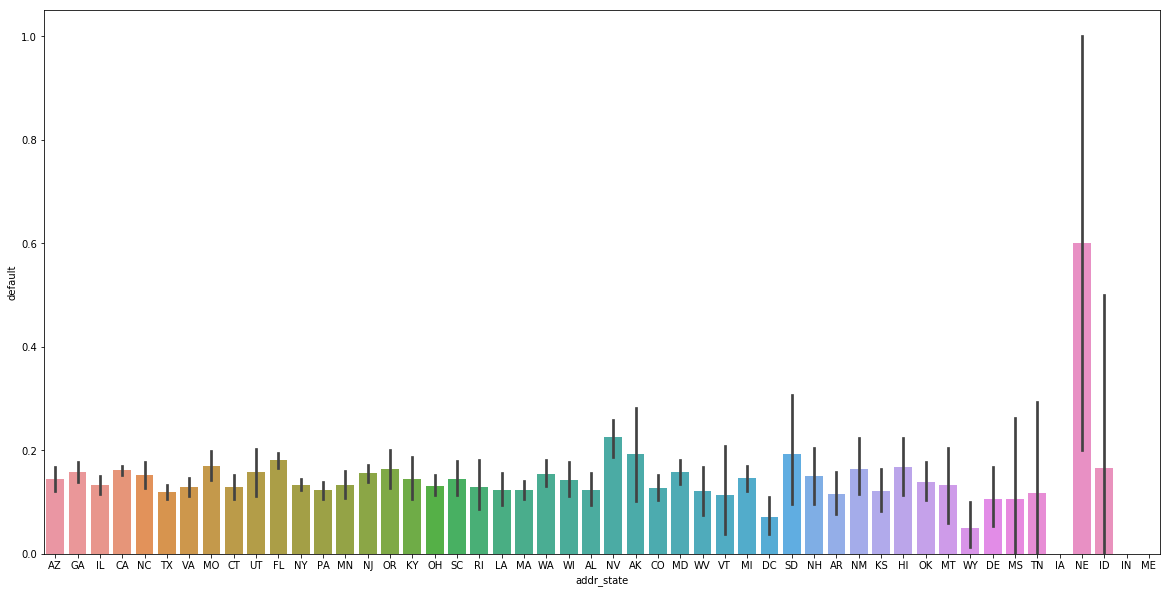

In [90]:
#loan by state
plt.figure(figsize=[20, 10])

sns.barplot(x='addr_state', y="default", data=loan)
plt.show()

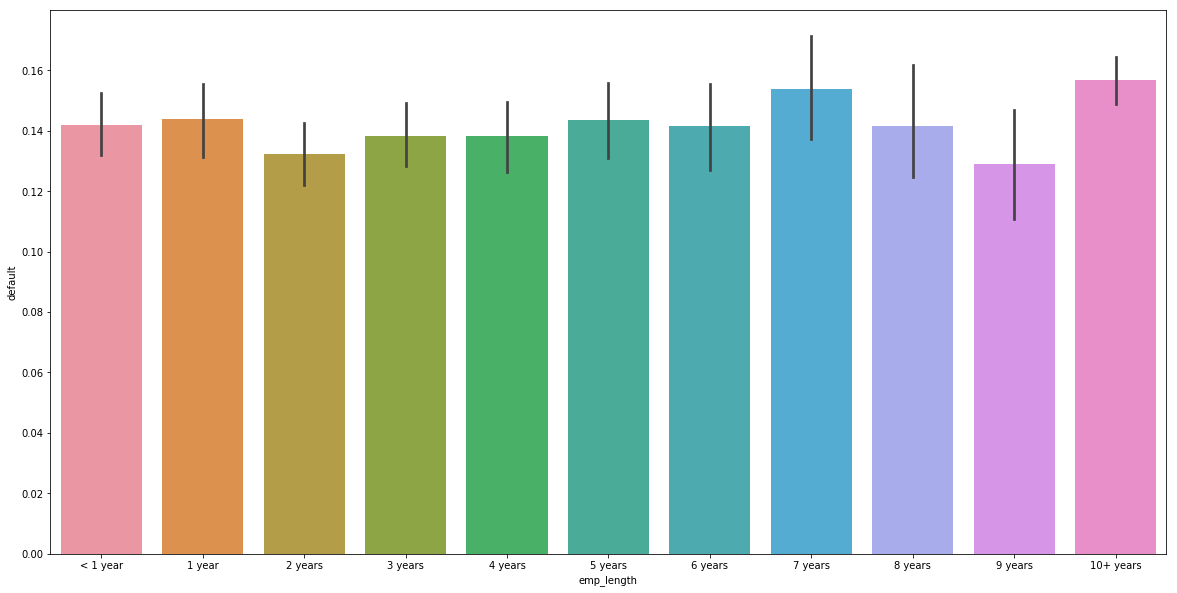

In [97]:
#loan by emplyment length
ld_by_emp_length = loan
custom_sort2 = {'< 1 year':0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10}
ld_by_emp_length['rank'] = ld_by_emp_length['emp_length'].map(custom_sort2)
ld_by_emp_length.sort_values( 'rank' ,inplace=True) 
plt.figure(figsize=[20, 10])

sns.barplot(x='emp_length', y="default", data=ld_by_emp_length)
plt.show()

In [98]:
loan_defaulters_bva = loan[ ['loan_amnt','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','pub_rec_bankruptcies','revol_bal','total_acc','total_pymnt',
'total_rec_prncp']]

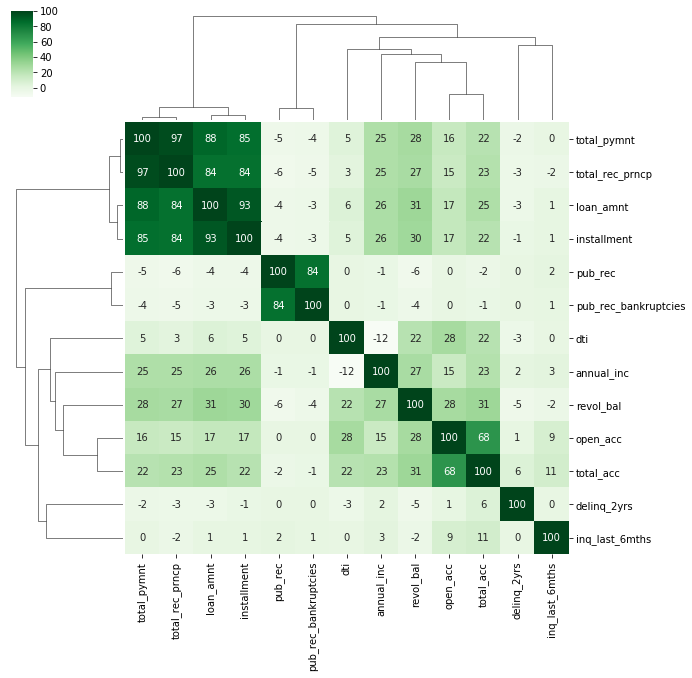

In [105]:
corr = loan_defaulters_bva.corr().mul(100).astype(int)
sns.clustermap(data=corr, annot=True, fmt='d', cmap='Greens').savefig('cluster.png')

In [106]:

# Conclusion:

## Correlation - Positive 
#### "pub_rec" and "pub_rec_bankruptcies" has positive correlation of +86. Which means a applicant/customer who has derogatory public records has a high chance of having huge number of public record bankruptcies.

## Correlation - Negative
#### "pub_rec" and "pub_rec_bankruptcies" has negative correlation with "total_pymnt" as -4 and -3 respectively. Which means a applicant/customer who has derogatory public records or public record bankruptcies has a very less chance of repaying the loan amount. Leading them to be a defaulter. So avoid giving loan to these applicants.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------
